<a href="https://colab.research.google.com/github/shashwat-2077/NASA_Image_Colourizer/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Code/NASA/Satellite Image Colorizer/test_images/sample1.jpg")

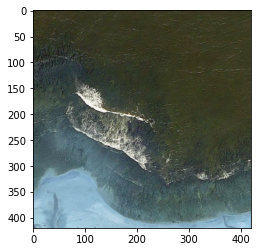

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(420, 420, 3)

In [ ]:
(r, g, b) = cv2.split(img)

In [ ]:
r.shape

(420, 420)

In [ ]:
b.shape

(420, 420)

In [ ]:
b

array([[ 42,  42,  32, ...,  34,  27,  39],
       [ 34,  34,  46, ...,  37,  40,  47],
       [ 33,  26,  32, ...,  31,  40,  30],
       ...,
       [196, 215, 204, ..., 218, 216, 214],
       [201, 195, 184, ..., 213, 215, 218],
       [192, 157, 149, ..., 217, 219, 216]], dtype=uint8)

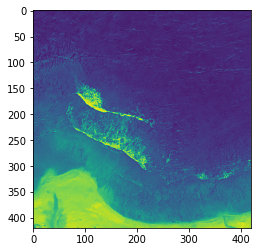

In [ ]:
plt.imshow(b)

# Upload and Unzip

We have also shared a zip folder, upload the same to colab memory
and unzip it using the following command

After unzipping you will get the following 4 files and folders.

In [ ]:
# # Upload Satellite Image Colorizer.zip to colab storage from left pane

# !unzip -q Satellite\ Image\ Colorizer.zip

# Import required libraries

NumPy: All images are stored as NumPy arrays
SkImage: Used to read and apply operations on image
Tensorflow/Keras: For loading tensorflow/keras trained model
Matplotlib: Plotting images
os: To get all the list of images present in a directory
utils: utils.py has two functions to convert RGB to LAB and LAB
to RGB.
Libraries to be used:

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
# import utils

As utils is a custom function we have to define it as a function

In [ ]:
from matplotlib import image
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize

def L_AB2RGB(l, ab, dim):
    image = np.empty(dim + (3,))
    image[:,:,0] = l.reshape(dim)
    image[:,:,1:] = ab * 128
    return lab2rgb(image)

def RGB2L_AB(rgb, dim):
    rgb = rgb.reshape(dim+(3,))
    # /255 not required as resize returns in [0,1] range
    # rgb = rgb / 255
    lab = rgb2lab(rgb)
    l = np.empty(dim+(1,))
    ab = np.empty(dim+(2,))
    l = np.expand_dims(lab[:,:,0], axis=2)
    ab = lab[:,:,1:] / 128
    return l, ab

# Defining Constants

We need to define image dimension as (128, 128) because the trained
model can only take the image with this size.

In [ ]:
# size of image on which model was trained
# me need to resize all the images to this size


IMAGE_DIMENSION =(128, 128) 

# Loading trained autoencoder model
The trained model is inside the "model" folder. Loading a model
consists of two steps:
1. Loading model structure
2. Loading Model weights

Keras models can be loaded using models.load_model function.

In [ ]:
# load trained autoencoder

autoencoder = load_model('/content/drive/MyDrive/Code/NASA/Satellite Image Colorizer/model/colorizer')

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 65536)             369664    
_________________________________________________________________
decoder (Functional)         (None, 128, 128, 2)       960066    
Total params: 1,329,730
Trainable params: 1,329,730
Non-trainable params: 0
_________________________________________________________________


# Testing on images

All images are in the "test_imags" folder. We need to find their
names, or you can upload your own image that you want to test.
Make sure image_file_name variable have correct filename of image.

In [ ]:
test_image_dir = '/content/drive/MyDrive/Code/NASA/Satellite Image Colorizer/test_images'
testing_files = os.listdir(test_image_dir)
print('FOUND {} IMAGES'.format(len(testing_files)))

FOUND 10 IMAGES


In [ ]:
CHOSEN_IMAGE_INDEX = 4
print('Testing on ', testing_files[CHOSEN_IMAGE_INDEX])
image_file_name = testing_files[CHOSEN_IMAGE_INDEX]

Testing on  sample5.jpg


## Reading image

Now we will be using skimage to read the image, and matplotlib to
plot that image. We also have to resize our image to required size of
(128, 128)

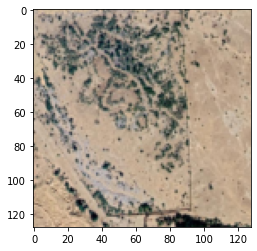

In [ ]:
# reading image
image = imread('/content/drive/MyDrive/Code/NASA/Satellite Image Colorizer/test_images/sample5.jpg')
# some images have 4 channels for transparency (like png images), discarding 4th channel
image = image[:,:,:3]
# resizing image to required dimension
image = resize(image, IMAGE_DIMENSION)

# plotting image
plt.imshow(image)

## RGB to LAB

This step is required if you are testing on color image

As we have color image, so we will be first converting to LAB \
L - Lightness (Black and White) \
A, B -  Color

We will pass L to autoencoder which will predict A', and B'. To get full RGB image we will convert LA'B' to RGB

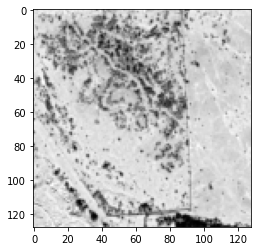

In [ ]:
# converting to lab color 
l, ab = RGB2L_AB(image, IMAGE_DIMENSION)

# plotting l channel (black and white)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')

## Predicting color from grayscale image (L)
Now we will be using a trained model to predict color i.e A, B channel
of LAB image.

In [ ]:
# predicting color of black and white image

predicted_ab = autoencoder.predict(np.expand_dims(l, axis=0))

## Converting LA'B' to RGB

Now we will be using L (input) A, B (output) to create RGB image.

In [ ]:
# converting LA'B' to RGB

colorized_image = L_AB2RGB(l, predicted_ab[0], IMAGE_DIMENSION)
print("FInal color image shape ",colorized_image.shape)

FInal color image shape  (128, 128, 3)


## Result Comparision

Now we will be plotting all the images (grayscale image, predicted
color image, original color image) for comparision

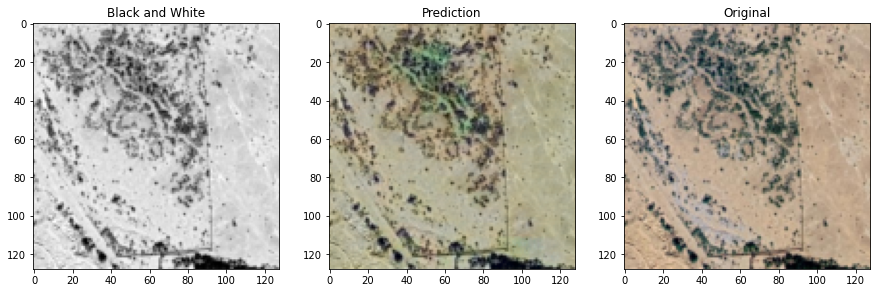

In [ ]:
# plotting all images

plt.figure(figsize=(15,18))
plt.subplot(1,3,1)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')
plt.title('Black and White')

plt.subplot(1,3,2)
plt.imshow(colorized_image)
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(image)
plt.title('Original')

plt.show()

# Drive Link

https://drive.google.com/drive/folders/1YqZP-MhlMB_zWn9MXjU39E1uz7fLMX6A?usp=sharing